In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Here is bar plots to show the frequency of categorical features:

Text(0.5, 1.0, 'Marrital status')

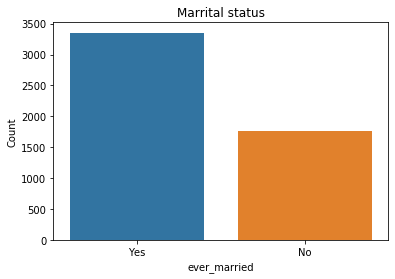

In [8]:
sns.countplot(x='ever_married', data=data)
plt.xlabel('ever_married')
plt.ylabel('Count')
plt.title('Marrital status')

Text(0.5, 1.0, 'Marrital status')

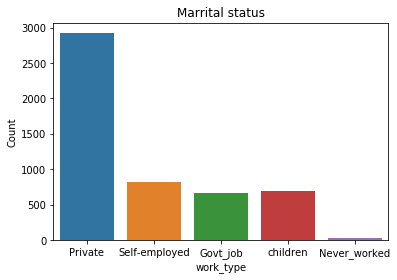

In [9]:
sns.countplot(x='work_type', data=data)
plt.xlabel('work_type')
plt.ylabel('Count')
plt.title('Marrital status')

Text(0.5, 1.0, 'Marrital status')

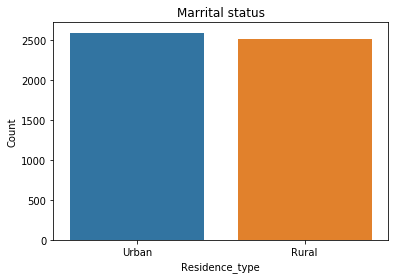

In [10]:
sns.countplot(x='Residence_type', data=data)
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.title('Marrital status')

Text(0.5, 1.0, 'Marrital status')

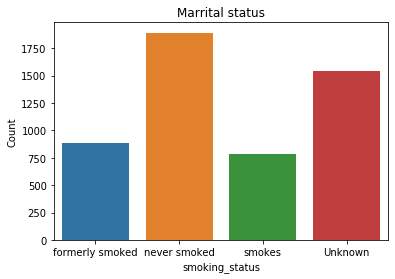

In [11]:
sns.countplot(x='smoking_status', data=data)
plt.xlabel('smoking_status')
plt.ylabel('Count')
plt.title('Marrital status')

# Here is bar plots for stroke frequency on different parameters:

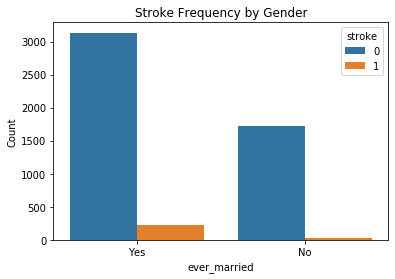

In [12]:
sns.countplot(x='ever_married', hue='stroke', data=data)

# Set the axis labels and title
plt.xlabel('ever_married')
plt.ylabel('Count')
plt.title('Stroke Frequency by Gender')

# Show the plot
plt.show()

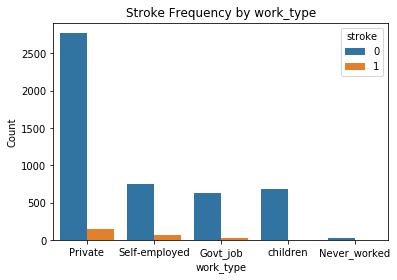

In [13]:
sns.countplot(x='work_type', hue='stroke', data=data)

# Set the axis labels and title
plt.xlabel('work_type')
plt.ylabel('Count')
plt.title('Stroke Frequency by work_type')

# Show the plot
plt.show()

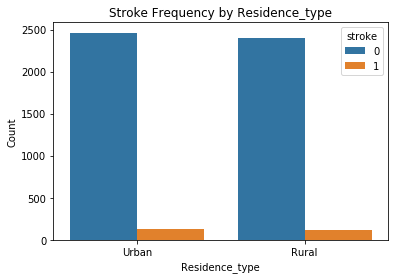

In [14]:
sns.countplot(x='Residence_type', hue='stroke', data=data)

# Set the axis labels and title
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.title('Stroke Frequency by Residence_type')

# Show the plot
plt.show()

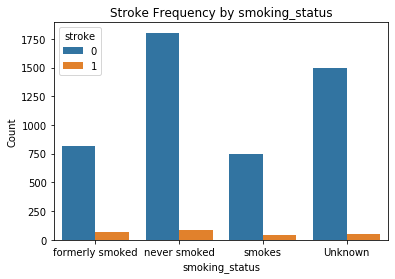

In [15]:
sns.countplot(x='smoking_status', hue='stroke', data=data)

# Set the axis labels and title
plt.xlabel('smoking_status')
plt.ylabel('Count')
plt.title('Stroke Frequency by smoking_status')

# Show the plot
plt.show()

#  Distribution plot to understand how age impacts having a stroke:

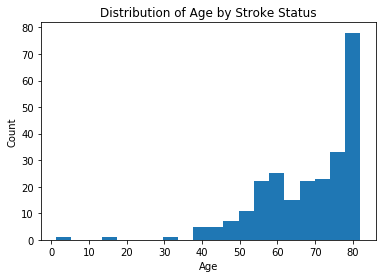

In [16]:
plt.hist(data[data['stroke']==1]['age'], bins=20, label='Stroke')

# Set the axis labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Stroke Status')


# Show the plot
plt.show()

Description: The plot shows that the number of people having stroke in ages below 40 is very low. 
             The number of people who got stroke after age of 75 has increased considerably. 
             Therefore, the probability of getting stroke increases by increasing the age. 

# violin plot to understand the patients likelihood of getting a stroke

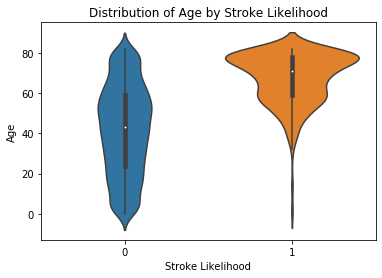

In [17]:
sns.violinplot(x='stroke', y='age', data=data)

# Set the axis labels and title
plt.xlabel('Stroke Likelihood')
plt.ylabel('Age')
plt.title('Distribution of Age by Stroke Likelihood')

# Show the plot
plt.show()

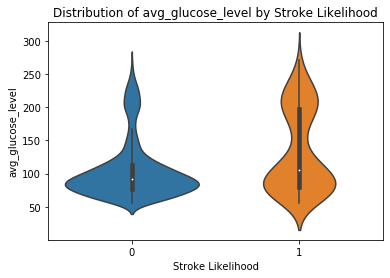

In [18]:
sns.violinplot(x='stroke', y='avg_glucose_level', data=data)

# Set the axis labels and title
plt.xlabel('Stroke Likelihood')
plt.ylabel('avg_glucose_level')
plt.title('Distribution of avg_glucose_level by Stroke Likelihood')

# Show the plot
plt.show()

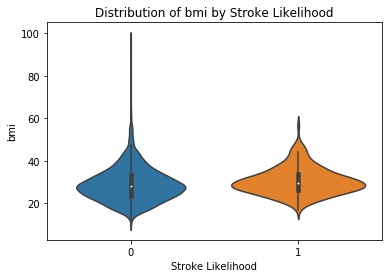

In [19]:
sns.violinplot(x='stroke', y='bmi', data=data)

# Set the axis labels and title
plt.xlabel('Stroke Likelihood')
plt.ylabel('bmi')
plt.title('Distribution of bmi by Stroke Likelihood')

# Show the plot
plt.show()

# Is this dataset imbalanced?

In [20]:
counts = data['stroke'].value_counts()

print(counts)

0    4861
1     249
Name: stroke, dtype: int64


Answer: This data set is imbalance because the number of people
        who got stroke are much less that the ones who didnt get stroke.

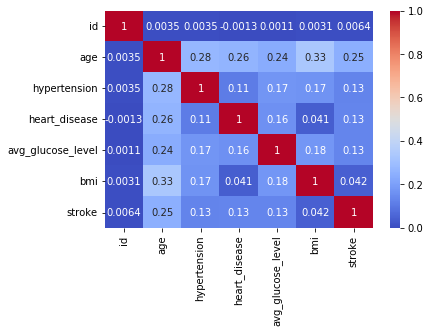

In [21]:
corr = data.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

Description: 
    Age has the most correlation with stroke.
    bmi is the most correlated feature with stroke. (id is not an valid feature to count on the result for correlation)
    hypertension, heart diseas, and glucose level has the same correlation to stroke.
    The order of correlation is:
    age > hypertension = heart diseas = glucose level > bmi > id


# Check for outliers in the BMI column and Average_Glucose Column and remove them

In [22]:
# Define the columns of interest
cols_of_interest = ['bmi', 'avg_glucose_level']

# Calculate the interquartile range for each column
Q1 = data[cols_of_interest].quantile(0.25)
Q3 = data[cols_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers as 1.5 times the IQR above or below the quartiles
outlier_threshold = 1.5 * IQR

# Identify the outliers in each column and remove them from the dataframe
data = data[~((data[cols_of_interest] < (Q1 - outlier_threshold)) | (data[cols_of_interest] > (Q3 + outlier_threshold))).any(axis=1)]

# Check the new distribution of each column to see if the outliers have been removed
data[cols_of_interest].describe()

,bmi,avg_glucose_level
count,4261.000000,4401.000000
mean,27.811992,91.483933
std,6.721473,22.663934
min,10.300000,55.120000
25%,23.000000,75.070000
50%,27.400000,88.040000
75%,32.100000,104.030000
max,47.500000,168.680000


# Handle the null values for BMI:

In [23]:
bmi_mean = data[data["bmi"] != 0]["bmi"].mean()

In [26]:
si = SimpleImputer(missing_values= np.nan, strategy= 'constant', fill_value= bmi_mean)

In [27]:
si.fit(data[['bmi']])

SimpleImputer(add_indicator=False, copy=True, fill_value=27.811992490025883,
              missing_values=nan, strategy='constant', verbose=0)

In [28]:
data['bmi'] = si.transform(data[['bmi']])

In [30]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Transform the variables that are an object datatype. 

In [34]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [35]:
le = LabelEncoder()

In [36]:
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [37]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,27.811992,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,27.811992,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0
